In [1]:
from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from machine_modifications.random_graph_functions import *
import networkx as nx
import numpy as np
import math


In [2]:
# Objective is to minimize MRT + E
mrt = True
tie_breaking_rule = 2
plot = False


max_counter = 1
#num_task_lst = [10, 25, 50, 100, 200]
num_machine_lst = [1, 2, 5]
min_lb_lst = []
min_lb_precise_lst = []

max_ub_lst = []
max_ub_precise_lst = []

opt_obj_lst = []
num_tasks = 100

for num_machines in num_machine_lst:
    
    min_lb = float('inf')
    min_lb_precise = float('inf')
    
    max_ub = -float('inf')
    max_ub_precise = -float('inf')
    opt_obj = []
    
    min_ratio = np.infty
    max_ratio = -np.infty
    saved_max_seed = None
    saved_min_seed = None
    max_overall_ratio = - np.infty
    counter = 0
    
    print("On " + str(num_tasks))
    
    while counter != max_counter:
        
        print("Test " + str(counter) )
        # Random
        
       
        
        seed=random.randint(0, 100000)
        edges = num_tasks
        G = random_dag(num_tasks, edges, seed=seed)
        
#         G = random_all_fork(num_tasks, seed)
    #     print(seed)
    #     make_graph_visual(G, num_tasks)

        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]

        # Get ordering using modified ETF
        test = Mod_ETF(G, w, s, num_machines, tie_breaking_rule, plot=plot)

    #     # Initialize objective function value
        heuristic_opt = test.obj_value

        # Get pseudosize, convert to speed
        psize, group_interval = approx_psize_homogeneous(G, test.order, test.h, test.t, verbose=False)
        s_prime = psize_to_speed(psize)

        # Get ordering using modified ETF
        test2 = Mod_ETF(G, w, s_prime, num_machines, tie_breaking_rule, plot=plot)

        # Check if the objective function value has improved
        if heuristic_opt > test2.obj_value:
            heuristic_opt = test2.obj_value
            s = s_prime

#         print("Final objective value: " + str(heuristic_opt))

        # Given ordering, find optimal speeds
#         print("From opt check:")
        temp = get_objective_single_ordering(mrt, G, w, test.order, plot=plot, compare=False)
        opt_intervals, s_opt, obj_opt, _ = temp 
        if s_opt[0] != -1:
            counter += 1

            if (heuristic_opt / obj_opt) > max_overall_ratio:
                max_overall_ratio = heuristic_opt / obj_opt

#             print("ACTUAL speed values:")
#             for i in range(len(s_opt)):
#                 print("Task " + str(i) + ": " + str(s_opt[i]))

#             print("APPROX speed values:")
#             for i in range(len(s)):
#                 print("Task " + str(i) + ": " + str(s[i]))

            s_ratios = [s[i] / s_opt[i] for i in range(len(s))]
#             print(s_ratios)

            if max(s_ratios) > max_ratio:
                max_ratio = max(s_ratios)
                saved_max_seed = seed

            if min(s_ratios) < min_ratio:
                min_ratio = min(s_ratios)
                saved_min_seed = seed
                
            obj_lb = 2 * sum(psize_to_speed(lb_lst(G, num_machines, test.order)))
            #print(num_concurrent_running_tasks(num_tasks, group_interval))
            obj_lb_precise = 2 * sum(psize_to_speed(lb_lst_precise(G, num_machines, test.order, num_concurrent_running_tasks(num_tasks, group_interval))))
            min_lb = min(obj_lb, min_lb)
            min_lb_precise = min(obj_lb_precise, min_lb_precise)
            
            
            obj_ub = 2 * sum(psize_to_speed(ub_lst(G, test.order)))
            obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, test.order)))
            max_ub = max(obj_ub, max_ub)
            max_ub_precise = max(obj_ub_precise, max_ub_precise)
            
            
            opt_obj.append(obj_opt)
                
            

        else:
            
            print("SKIP THIS ONE")
    
    
    min_lb_lst.append(min_lb)
    min_lb_precise_lst.append(min_lb_precise)
    
    max_ub_lst.append(max_ub)
    max_ub_precise_lst.append(max_ub_precise)
    
    
    opt_obj_lst.append(opt_obj)    
    
    print(num_tasks, max_overall_ratio)

On 100
Test 0
100 1.000000040364325
On 100
Test 0
100 1.127021282719011
On 100
Test 0
100 1.226125758744832


In [3]:
# opt_obj_lst = [[28.8968, 32.07837, 30.53146, 33.97633, 31.14696, 30.78461, 31.07034, 25.85483, 30.23114, 27.54529, 31.22073, 44.93656, 34.0796, 33.90483, 29.41348, 44.93656, 28.8968, 31.57267, 44.93656, 26.30596, 32.58449, 30.78461, 29.94101, 31.05719, 44.93656, 27.51326, 33.00032, 24.97056, 32.89774, 30.74425, 33.2368, 32.96829, 28.49207, 29.11515, 28.41504, 29.20868, 26.77781, 34.96829, 34.06523, 29.51326, 27.28356, 27.12052, 37.91256, 27.15298, 24.89898, 44.93656, 29.91765, 29.51326, 33.52933, 26.27394], [69.04646, 79.38272, 87.45141, 75.62152, 82.65349, 78.47395, 78.73344, 77.34888, 85.40518, 92.00888, 72.6255, 85.20587, 78.81592, 75.56956, 84.66135, 81.35182, 87.85561, 78.67501, 79.99744, 95.49231, 87.25566, 89.9411, 81.99473, 69.551, 70.8844, 88.11989, 171.26756, 93.29447, 82.82399, 72.90709, 75.49762, 72.55205, 124.20712, 82.21643, 95.44188, 96.93112, 89.55481, 96.0494, 83.82332, 72.46256, 78.92955, 87.56526, 77.38325, 79.56215, 89.52634, 82.25229, 124.22615, 83.89918, 171.26756, 85.10489], [179.92807, 178.19384, 159.71706, 159.22552, 170.9705, 200.73051, 157.91632, 164.17058, 171.27919, 196.4747, 166.35718, 181.09402, 155.50347, 342.53511, 169.30535, 153.64345, 186.67361, 348.06833, 172.15127, 167.62778, 478.07159, 178.53652, 159.54201, 153.90389, 240.13719, 176.29077, 157.22403, 224.68278, 149.16474, 181.93674, 160.18295, 194.40183, 154.91261, 170.59416, 202.27773, 167.80058, 147.85552, 156.8398, 172.98936, 162.12356, 171.75474, 169.25379, 284.54524, 189.33555, 154.70917, 179.31157, 157.21941, 197.54409, 166.19444, 168.95917], [330.09582, 404.69196, 310.15094, 263.79773, 246.70322, 249.64094, 242.07682, 251.73571, 243.07516, 227.81296, 253.52481, 255.65584, 243.77071, 269.78073, 240.084, 270.16216, 248.17634, 296.28766, 254.88751, 271.08269, 276.71564, 284.11632, 522.76052, 312.60074, 229.14936, 253.14765, 328.29149, 237.42684, 239.31389, 303.32408, 276.84637, 624.14254, 287.87206, 351.89787, 253.28857, 306.29142, 258.9726, 252.60324, 245.29802, 274.26459, 237.07285, 231.29466, 262.84509, 271.76712, 258.50958, 295.63845, 269.93765, 517.3713, 246.23863, 279.86505], [366.4319, 373.21991, 341.79199, 434.86295, 395.3082, 474.97405, 347.45241, 426.05688, 317.28236, 964.01632, 321.34189, 348.02477, 399.61636, 339.12026, 322.28232, 370.83981, 333.23314, 420.09095, 349.28756, 355.04846, 329.49862, 351.18427, 368.43504, 379.80767, 529.78809, 348.20735, 341.27118, 366.99296, 334.94124, 331.44926, 357.95825, 344.91294, 685.07023, 344.51836, 369.71026, 360.11052, 371.74759, 377.28076, 350.14316, 319.00134, 333.75627, 308.95422, 354.63312, 327.52332, 343.40668, 376.69953, 392.41957, 451.94637, 381.70453, 337.72917], [524.93261, 595.08784, 572.24343, 553.863, 632.20035, 514.75518, 594.3972, 501.81286, 602.40227, 501.82427, 608.8354, 641.09052, 528.61128, 790.2182, 470.40971, 619.85791, 547.24478, 569.45215, 500.58995, 490.578, 583.82906, 495.75627, 706.35585, 544.44292, 516.26088, 544.07932, 586.97523, 487.17529, 497.31319, 751.00172, 658.69599, 538.91902, 517.53279, 541.40882, 539.4439, 549.00858, 544.82834, 532.15266, 826.43192, 534.24309, 809.38392, 474.37077, 1042.99116, 649.56223, 551.56548, 508.43412, 569.80201, 1434.21477, 576.57958, 522.72951], [681.02766, 674.61667, 711.4672, 727.72572, 823.38058, 722.12665, 703.67201, 828.76254, 621.98815, 780.56261, 856.4355, 659.97483, 867.35164, 798.36681, 694.96202, 647.16759, 703.27221, 691.8258, 719.54932, 686.9439, 722.97698, 791.475, 736.64369, 819.80276, 837.5214, 1373.40342, 738.42969, 915.38787, 687.69701, 693.66938, 680.42682, 1157.98831, 753.96435, 838.41403, 782.86587, 1165.70226, 714.6216, 778.84393, 740.22008, 650.43256, 675.07438, 2685.85169, 842.01137, 707.19618, 730.5049, 750.12219, 703.90495, 680.31886, 783.15747, 752.55199], [969.3482, 927.00303, 929.69351, 876.30135, 901.36687, 2667.637, 1125.4536, 1258.3293, 1447.81669, 3073.97686, 1283.44597, 974.55882, 1021.16378, 1151.32584, 935.49009, 922.65378, 898.821, 1029.00315, 928.24775, 1663.16507, 904.03885, 1113.36582, 920.73239, 921.34367, 1053.05462, 977.79893, 1088.97527, 920.81604, 962.99293, 889.57481, 901.40104, 971.49548, 980.0123, 940.90254, 1076.22019, 1424.32295, 795.39127, 988.78657, 1069.64037, 954.20839, 1018.07524, 1133.53964, 1012.23485, 919.83447, 1003.25895, 990.72744, 1231.66452, 887.76032, 931.5741, 850.74368], [1032.35725, 1540.89932, 1101.42474, 1020.28427, 1106.08598, 1795.45338, 1080.08605, 1654.50626, 1325.67168, 1151.76822, 4930.58502, 4927.53116, 1192.97369, 1022.61383, 997.12149, 1044.87607, 1125.43937, 1491.14937, 1428.00612, 1197.09977, 1859.00145, 1043.41517, 1328.90912, 1169.2423, 1170.80299, 1111.36104, 1109.1584, 1028.8005, 1176.44724, 1108.95797, 1077.06633, 1017.99492, 2897.22162, 1079.60742, 1194.69988, 1106.27583, 1522.49085, 1138.47353, 1684.82805, 1094.38602, 1060.93066, 1085.9003, 1413.15298, 1122.60422, 1077.98245, 1083.04679, 1201.14785, 1572.46732, 1096.85969, 1205.75612]]
# num_task_lst = [10, 25, 50, 75, 100, 150, 200, 250, 300]
# max_ub_lst = [55, 325, 1275, 1565, 2753, 4263, 10513, 11312, 23732]
# min_lb_lst = [10, 25, 50, 75, 100, 150, 200, 250, 300]


In [4]:
# import matplotlib.pyplot as plt
# import math








# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# # avg_opt_vals = [np.mean(lst) for lst in opt_obj_lst]
# MAX_opt_vals = [max(lst) for lst in opt_obj_lst]
# MIN_opt_vals = [min(lst) for lst in opt_obj_lst]



# print(min_lb_precise_lst == min_lb_lst)

# print(min_lb_precise_lst, min_lb_lst)

# # ax.bar(num_task_lst, height=max_ub_lst, bottom=min_lb_lst)
# #plt.plot(num_task_lst, max_ub_lst, label='ub = (# remaining)', color='k')
# #plt.plot(num_task_lst, max_ub_precise_lst, label='ub = union of decendants of remaining tasks', color='r')

# plt.plot(num_task_lst, min_lb_precise_lst, label='lb = (# descendants) / num concurrent running tasks', color='r')
# plt.plot(num_task_lst, min_lb_lst, label='lb = (# descendants) / num machines', color='k')

# # plt.plot(num_task_lst, MAX_opt_vals, label='max opt obj function value', color='b')
# plt.plot(num_task_lst, MIN_opt_vals, label='min opt obj function value', color='b')

# plt.legend()
# plt.show()

False
[1342.9258942062957, 677.2669150876737, 297.8765270983495] [1342.9258942062957, 677.2669150876737, 288.9858475288914]


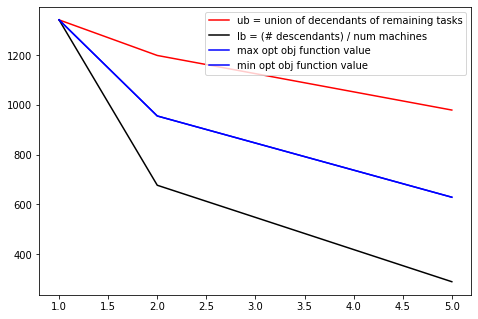

In [6]:
import matplotlib.pyplot as plt
import math








fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# avg_opt_vals = [np.mean(lst) for lst in opt_obj_lst]
MAX_opt_vals = [max(lst) for lst in opt_obj_lst]
MIN_opt_vals = [min(lst) for lst in opt_obj_lst]



print(min_lb_precise_lst == min_lb_lst)

print(min_lb_precise_lst, min_lb_lst)

# ax.bar(num_task_lst, height=max_ub_lst, bottom=min_lb_lst)
#plt.plot(num_task_lst, max_ub_lst, label='ub = (# remaining)', color='k')
plt.plot(num_machine_lst, max_ub_precise_lst, label='ub = union of decendants of remaining tasks', color='r')

#plt.plot(num_machine_lst, min_lb_precise_lst, label='lb = (# descendants) / num concurrent running tasks', color='r')
plt.plot(num_machine_lst, min_lb_lst, label='lb = (# descendants) / num machines', color='k')

plt.plot(num_machine_lst, MAX_opt_vals, label='max opt obj function value', color='b')
plt.plot(num_machine_lst, MIN_opt_vals, label='min opt obj function value', color='b')

plt.legend()
plt.show()